In [1]:
import torch
from torchvision import datasets, transforms
from torch import optim

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])

trainset = datasets.FashionMNIST('~/.pytorch/fashion_MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/fashion_MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [14]:
dataiterator = iter(trainloader)
images, labels = dataiterator.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [15]:
from torch import nn

In [17]:
model = nn.Sequential(nn.Linear(784,256),
                       nn.ReLU(),
                       nn.Dropout(p=0.2),
                       nn.Linear(256,128),
                       nn.ReLU(),
                       nn.Dropout(p=0.2),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Dropout(p=0.2),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1))

In [27]:
Criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [1]:
loss = 0
epochs =5
train_arr = []
test_arr = []
for e in range(epochs):
    for images,labels in trainloader:
        training_loss = 0
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = Criterion(output,labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
        print(loss.item())
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                images = images.view(images.shape[0],-1)
                logps = model(images)
                loss = Criterion(logps,labels)
                test_loss += loss.item()
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        train_arr.append(training_loss/len(trainloader))
        test_arr.append(test_loss/len(testloader))
        
        print(f"Epochs {e+1}: ")
        print(f"Training Loss: {training_loss/len(trainloader)}")
        print(f"Testing Loss: {test_loss/len(testloader)}")
        print(f"Testing Accuracy: {accuracy/len(testloader)*100}%")

NameError: name 'trainloader' is not defined

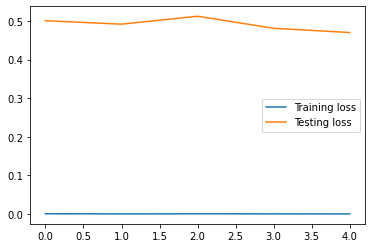

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_arr, label='Training loss')
plt.plot(test_arr, label='Testing loss')
plt.legend(loc='best')
plt.show()

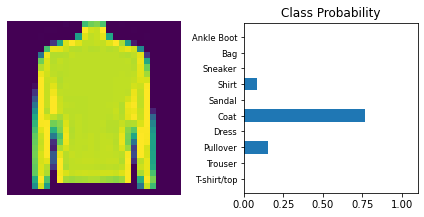

In [36]:
import helper

dataiterator = iter(testloader)
images,labels = dataiterator.next()
img = images[0].view(1,784)
logps = model(img)
ps = torch.exp(logps)
helper.view_classify(img.view(1,28,28),ps, version='Fashion')